In [1]:
# importing necessary lib's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading advertising csv file
advertise=pd.read_csv('advertising.csv')
advertise

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### EDA

In [3]:
# deleting unnecessary column
del advertise['Unnamed: 0']

In [4]:
advertise.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
advertise.shape

(200, 4)

we have 200 rows and 4 columns

In [6]:
# checking null values
advertise.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

no null values

In [7]:
# checking description
advertise.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


here we clearly see that TV has highest no. of sales and Radio has lowest no. of sales

### multivariate analysis

<AxesSubplot:>

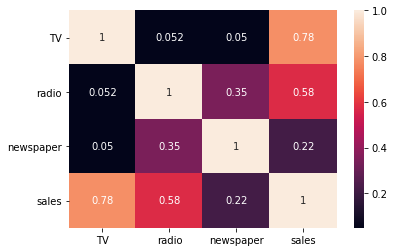

In [30]:
sns.heatmap(advertise.corr(),annot=True)

heatmap shoes strong relation of TV feature with target column sales

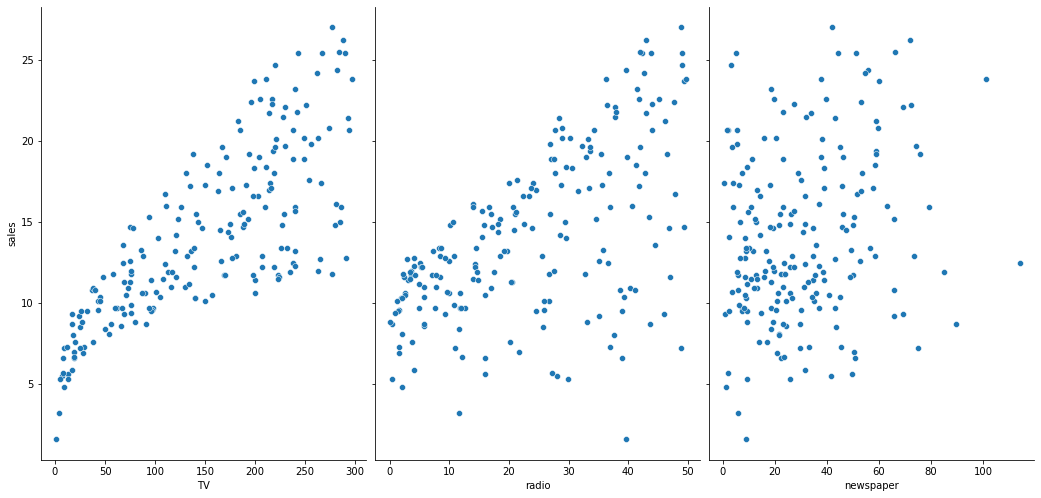

In [8]:
# multivariate
sns.pairplot(advertise, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7);

TV has less scattering in its sales 

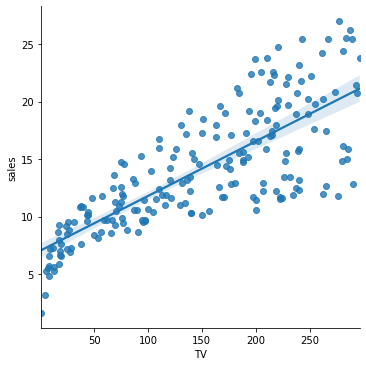

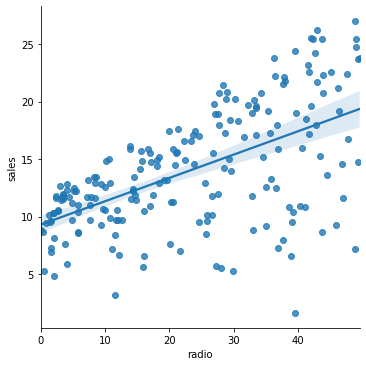

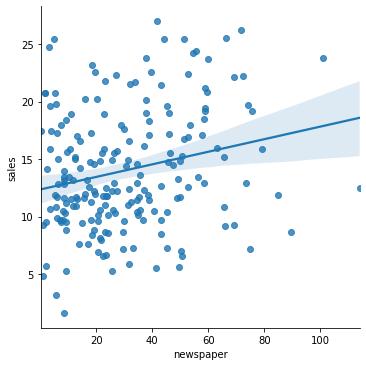

In [9]:
# numerical data plotting 
sns.lmplot(y='sales',x="TV",data=advertise)
sns.lmplot(y='sales',x='radio',data=advertise)
sns.lmplot(y='sales',x='newspaper',data=advertise)

<AxesSubplot:xlabel='sales', ylabel='TV'>

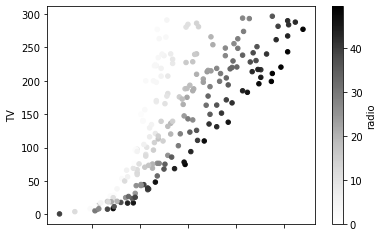

In [10]:
advertise.plot.scatter(x='sales',y='TV',c='radio')

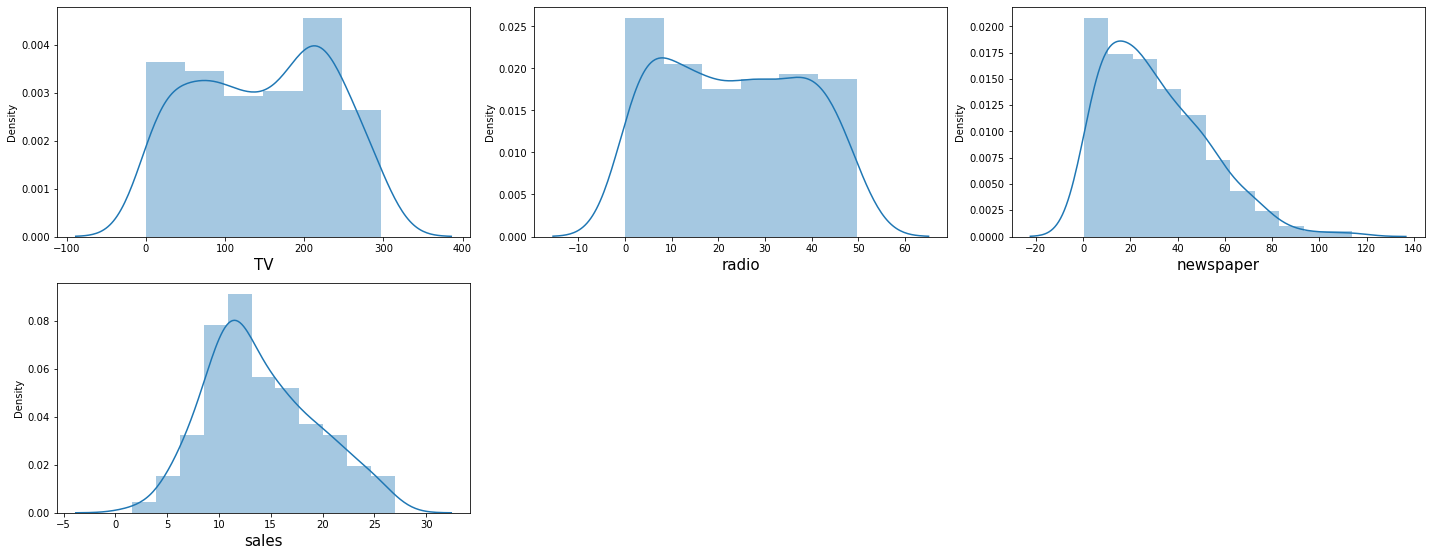

In [11]:
# univariate analysis
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for i in advertise:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(advertise[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

data look normal distributed except newspaper

In [12]:
# checking skewness values
advertise.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

newspaper value is more than .5

### removing skewness and outliers

In [13]:
# removing outliers and putting newspaper into normal distribution
q=advertise['newspaper'].quantile(.99)
advertise=advertise[advertise['newspaper']<q]

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

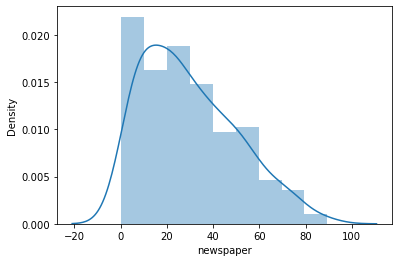

In [14]:
sns.distplot(advertise['newspaper'])

now newspaper look good

In [15]:
# check shape of data after removing outliers
advertise.shape

(198, 4)

we left with 198 rows and 4 columns

In [16]:
# splitting the data into x and y
x=advertise.drop('sales',axis=1)
y=advertise.sales

### standardization

In [17]:
# standardization of feature data
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x_scale=ss.fit_transform(x)

### model applying

In [ ]:
#importing necessary lib's for model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
# finding best random state
r2acc=0
maxrs=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2>r2acc:
        r2acc=r2
        maxrs=i
print('max r2 acc:',r2acc,'\nmaxrs:',maxrs)

max r2 acc: 0.9490864435424885 
maxrs: 444


best random state is 444

In [20]:
#splitting data in x_train,y_train,x_test and y_test
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=.25,random_state=maxrs)

In [21]:
# LinearRegression model  
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('--------------------------LogisticRegression------------------')
print(f'r2_score:{r2_score(y_test,pred)*100:.2f}%')
print(f'mean squared error:{mean_squared_error(y_test,pred)}')


# decisiontree regressor model  
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('\n\n--------------------------Decision Tree Regressor------------------')
print(f'r2_score:{r2_score(y_test,pred)*100:.2f}%')
print(f'mean squared error:{mean_squared_error(y_test,pred)}')

# KNeighbors regressor model
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
print('\n\n--------------------------KNeighbors Regressor------------------')
print(f'r2_score:{r2_score(y_test,pred)*100:.2f}%')
print(f'mean squared error:{mean_squared_error(y_test,pred)}')


# Support Vector regressor model
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('\n\n--------------------------Support Vector Regressor------------------')
print(f'r2_score:{r2_score(y_test,pred)*100:.2f}%')
print(f'mean squared error:{mean_squared_error(y_test,pred)}')


# RandomForest regressor model
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print('\n\n--------------------------RandomForest Regressor------------------')
print(f'r2_score:{r2_score(y_test,pred)*100:.2f}%')
print(f'mean squared error:{mean_squared_error(y_test,pred)}')


# AdaBoost regressor model
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred=abr.predict(x_test)
print('\n\n--------------------------AdaBoost Regressor------------------')
print(f'r2_score:{r2_score(y_test,pred)*100:.2f}%')
print(f'mean squared error:{mean_squared_error(y_test,pred)}')


--------------------------LogisticRegression------------------
r2_score:94.91%
mean squared error:1.37948937103737


--------------------------Decision Tree Regressor------------------
r2_score:92.69%
mean squared error:1.9810000000000003


--------------------------KNeighbors Regressor------------------
r2_score:94.27%
mean squared error:1.5536479999999988


--------------------------Support Vector Regressor------------------
r2_score:92.76%
mean squared error:1.9623424248101395


--------------------------RandomForest Regressor------------------
r2_score:97.37%
mean squared error:0.7113629799999989


--------------------------AdaBoost Regressor------------------
r2_score:92.91%
mean squared error:1.9201640461136567


### lasso and ridge to check overfitting

In [22]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [23]:
lassocv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)

alpha=lassocv.alpha_
print('best alpha value:',alpha)

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_train,y_train)
pred=lasso_reg.predict(x_test)
score=r2_score(y_test,pred)
print(f'\nr2_score:{score*100:.2f}')
print(f'mean square error:{mean_squared_error(pred,y_test)}')

best alpha value: 0.005288228959756167

r2_score:94.90
mean square error:1.3817064045303746


In [24]:
ridcv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridcv.fit(x_train,y_train)

alpha=ridcv.alpha_
print('best alpha value:',alpha)

rid_reg=Ridge(alpha)
rid_reg.fit(x_train,y_train)
rid_reg.score(x_train,y_train)
pred=rid_reg.predict(x_test)
print('\nr2_score:',r2_score(y_test,pred))
print('mean square error:',mean_squared_error(pred,y_test))

best alpha value: 0.001

r2_score: 0.949085763029855
mean square error: 1.3795078093475177


### cross validation

In [25]:
#applying cross validation to check overfitting
from sklearn.model_selection import cross_val_score

In [26]:
m=[lr,dtr,svr,knr,rfr,abr,lasso_reg,rid_reg]
for i in m:
    scr=cross_val_score(i,x_scale,y,cv=10)
    print('----------',i,'------------')
    print(f'cross val score:{scr.mean()*100:.2f}') 

---------- LinearRegression() ------------
cross val score:88.52
---------- DecisionTreeRegressor() ------------
cross val score:94.82
---------- SVR() ------------
cross val score:92.06
---------- KNeighborsRegressor() ------------
cross val score:94.32
---------- RandomForestRegressor() ------------
cross val score:97.82
---------- AdaBoostRegressor() ------------
cross val score:95.54
---------- Lasso(alpha=0.005288228959756167) ------------
cross val score:88.54
---------- Ridge(alpha=0.001) ------------
cross val score:88.52


### hyperparameter tuning

In [27]:
# applying hyperparameter tuning for least difference model which is knnr
from sklearn.model_selection import GridSearchCV

parameters={'n_neighbors':[4,5,7,9,11],
           'algorithm':['kd_tree','brute'],
           'leaf_size':[60,70,80,90,100]}

clf=GridSearchCV(knr,parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 60, 'n_neighbors': 5}

In [28]:
knr_new=KNeighborsRegressor(algorithm='kd_tree',leaf_size=60,n_neighbors=5)
knr_new.fit(x_train,y_train)
pred=knr_new.predict(x_test)
print(f'r2_score:{r2_score(y_test,pred)*100:.2f}%')
print(f'mean squared error:{mean_squared_error(y_test,pred)}')

r2_score:94.27%
mean squared error:1.5536479999999988


final test score is 94%

### saving model

In [29]:
# saving best model
import pickle
filename='advertising_new.pkl'
pickle.dump(knr_new,open(filename,'wb'))